# Web Programming with Flask - Group 15

## Importing Libraries

We begin by importing the necessary libraries for data manipulation and visualization.

In [4]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the Data

The data is loaded from a CSV file into a DataFrame. The head() method displays the first few rows of the dataset:

In [7]:
# Load the data
df = pd.read_csv("Data_Timbulan_Sampah_SIPSN_KLHK.csv")

# Display the first few rows of the dataset
df.head()

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,Kab. Aceh Selatan,96.78,"35,323.53"
1,2023,Aceh,Kab. Aceh Tenggara,114.15,"41,666.21"
2,2023,Aceh,Kab. Aceh Barat,100.86,"36,813.72"
3,2023,Aceh,Kab. Aceh Besar,148.09,"54,053.29"
4,2023,Aceh,Kab. Simeulue,45.14,"16,476.21"


## Inspecting the Data

The info() method provides a concise summary of the DataFrame, including the number of entries, column names, data types, and memory usage.

In [10]:
# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tahun                         1255 non-null   int64 
 1   Provinsi                      1255 non-null   object
 2   Kabupaten/Kota                1255 non-null   object
 3   Timbulan Sampah Harian(ton)   1255 non-null   object
 4   Timbulan Sampah Tahunan(ton)  1255 non-null   object
dtypes: int64(1), object(4)
memory usage: 49.2+ KB


## Checking for Missing Values

The isnull().sum() method checks for any missing values in each column.

In [13]:
# Check for missing values
df.isnull().sum()

Tahun                           0
Provinsi                        0
Kabupaten/Kota                  0
Timbulan Sampah Harian(ton)     0
Timbulan Sampah Tahunan(ton)    0
dtype: int64

There are no missing values in the dataset.

## Checking for Duplicates

In [16]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Tahun, Provinsi, Kabupaten/Kota, Timbulan Sampah Harian(ton), Timbulan Sampah Tahunan(ton)]
Index: []


We check for duplicate rows using the duplicated() method. The result indicates that there are no duplicate rows

## Counting Provinces per Year
We group the data by year and count the number of unique provinces:

In [19]:
# Count the number of provinces per year
provinces_per_year = df.groupby('Tahun')['Provinsi'].nunique()

# Tampilkan hasil
print(provinces_per_year)

Tahun
2018     1
2019    34
2020    36
2021    38
2022    37
2023    36
Name: Provinsi, dtype: int64


## Removing Data from 2018
We remove data from the year 2018 due to the low number of records (only 1 entry) from that year:

In [21]:
df = df.drop(df[df['Tahun'] == 2018].index)
print(df)

      Tahun          Provinsi         Kabupaten/Kota  \
0      2023              Aceh      Kab. Aceh Selatan   
1      2023              Aceh     Kab. Aceh Tenggara   
2      2023              Aceh        Kab. Aceh Barat   
3      2023              Aceh        Kab. Aceh Besar   
4      2023              Aceh          Kab. Simeulue   
...     ...               ...                    ...   
1249   2019      Maluku Utara  Kota Tidore Kepulauan   
1250   2019             Papua       Kab. Biak Numfor   
1251   2019             Papua          Kota Jayapura   
1252   2019     Papua Selatan             Kab. Asmat   
1253   2019  Papua Barat Daya        Kab. Raja Ampat   

     Timbulan Sampah Harian(ton) Timbulan Sampah Tahunan(ton)  
0                          96.78                    35,323.53  
1                         114.15                    41,666.21  
2                         100.86                    36,813.72  
3                         148.09                    54,053.29  
4      

## Changing Data Types
We convert the columns Timbulan Sampah Harian(ton) and Timbulan Sampah Tahunan(ton) from strings to floats for numerical analysis. The replace() method is used to remove commas before type conversion.

In [23]:
# Remove commas from numerical values and convert to float
df['Timbulan Sampah Harian(ton)'] = df['Timbulan Sampah Harian(ton)'].str.replace(",", "").astype(float)
df['Timbulan Sampah Tahunan(ton)'] = df['Timbulan Sampah Tahunan(ton)'].str.replace(",", "").astype(float)

# Data Visualization

## 1. Total annual waste generation in each province in each year

In [26]:
total_annual_waste = df.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().reset_index()
total_annual_waste.head()

,Tahun,Provinsi,Timbulan Sampah Tahunan(ton)
0,2019,Aceh,254830.94
1,2019,Bali,797720.94
2,2019,Banten,2425292.19
3,2019,Bengkulu,145167.80
4,2019,D.I. Yogyakarta,783652.45


## 2. Average total annual waste generation in each province for all years

In [28]:
average_annual_waste = total_annual_waste.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()
average_annual_waste['Timbulan Sampah Tahunan(ton)'] = average_annual_waste['Timbulan Sampah Tahunan(ton)'].round(3)
print(average_annual_waste)

                     Provinsi  Timbulan Sampah Tahunan(ton)
0                        Aceh                    362484.734
1                        Bali                    946382.616
2                      Banten                   1738484.502
3                    Bengkulu                     99878.102
4             D.I. Yogyakarta                    531841.040
5                 DKI Jakarta                   2734347.084
6                   Gorontalo                     90688.958
7                       Jambi                    265921.610
8                  Jawa Barat                   3641283.866
9                 Jawa Tengah                   4527590.120
10                 Jawa Timur                   4691367.970
11           Kalimantan Barat                    488165.972
12         Kalimantan Selatan                    620292.566
13          Kalimantan Tengah                    348210.116
14           Kalimantan Timur                    678114.254
15           Kalimantan Utara           

## 3. Province that produces the most annual waste generation each year

In [30]:
most_annual_waste_province = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]
print(most_annual_waste_province)

     Tahun     Provinsi  Timbulan Sampah Tahunan(ton)
10    2019   Jawa Timur                    5413713.50
43    2020  Jawa Tengah                    4236201.24
79    2021  Jawa Tengah                    5021888.22
117   2022  Jawa Tengah                    5904061.08
155   2023   Jawa Timur                    4509970.46


## 4. Province that produces the least annual waste generation each year

In [32]:
least_annual_waste_province = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]
print(least_annual_waste_province)

     Tahun          Provinsi  Timbulan Sampah Tahunan(ton)
23    2019  Papua Barat Daya                      12090.99
60    2020     Papua Selatan                      16075.33
95    2021  Papua Barat Daya                      12310.72
133   2022  Papua Barat Daya                      18162.69
160   2023  Kalimantan Utara                       5234.83


## 5. Total Annual Amount of Waste in Each Province from 2019 to 2023

C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


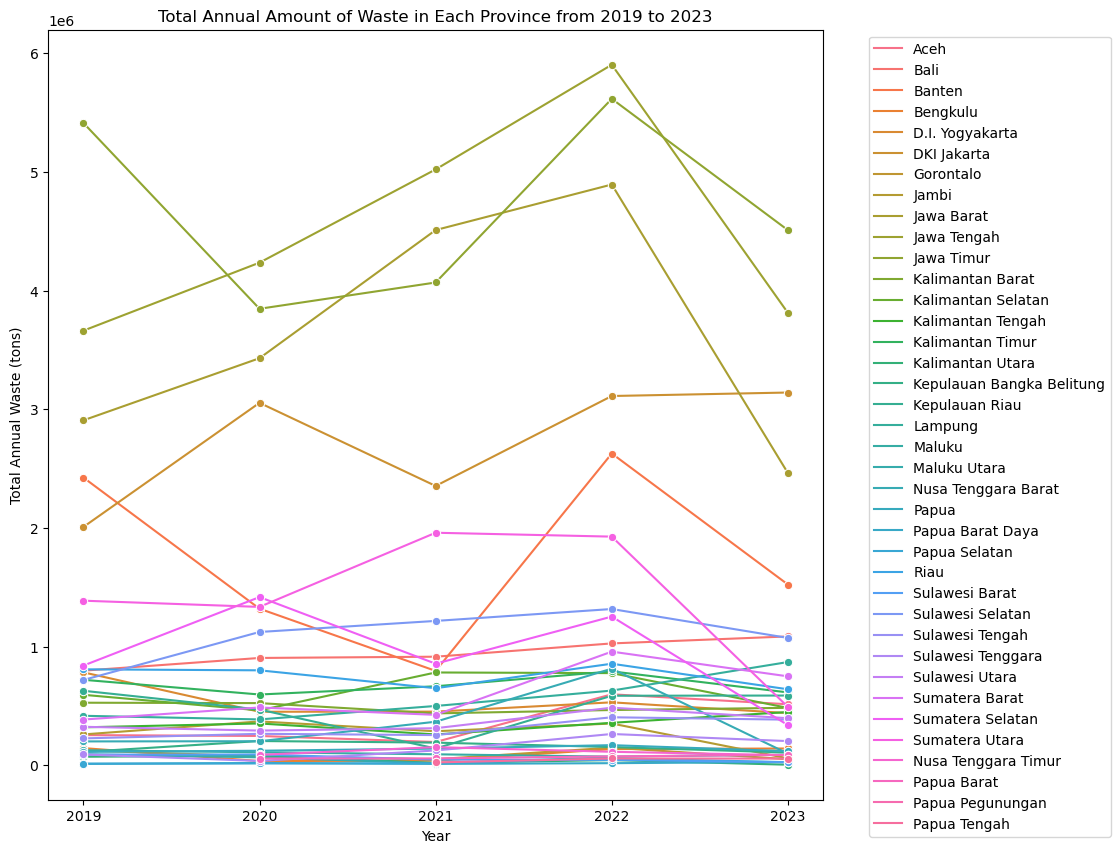

In [34]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=total_annual_waste, x='Tahun', y='Timbulan Sampah Tahunan(ton)', hue='Provinsi', marker='o')
plt.title('Total Annual Amount of Waste in Each Province from 2019 to 2023')
plt.ylabel('Total Annual Waste (tons)')
plt.xlabel('Year')
plt.xticks(total_annual_waste['Tahun'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insight:
- There is a general fluctuation in waste generation across the provinces over the years.
- Some provinces show a consistent increase or decrease, while others exhibit more variability.
- The provinces with the highest waste generation are clearly above others. These include Jawa Barat, Jawa Tengah, Jawa Timur
- The year 2022 seems to be a peak for many provinces, followed by a decline in 2023.
- Jawa provinces (Jawa Barat, Jawa Tengah, Jawa Timur) are among the highest waste producers, possibly due to higher population densities and industrial activities.
- 
Provinces from less densely populated regions, like Maluku and Papua, have lower waste generation.

## 6. Categorization and visualization of average annual waste in each province for the entire year

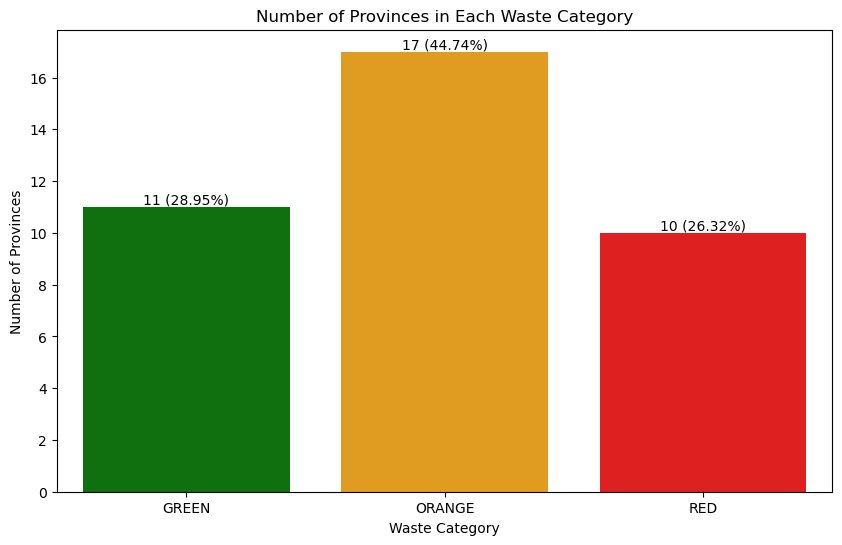

In [37]:
def categorize_waste(amount):
    if amount <= 100000:
        return 'GREEN'
    elif 100000 < amount <= 700000:
        return 'ORANGE'
    else:
        return 'RED'

average_annual_waste['Category'] = average_annual_waste['Timbulan Sampah Tahunan(ton)'].apply(categorize_waste)

# Count the number of provinces in each category
category_counts = average_annual_waste['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Calculate the percentages
category_counts['Percentage'] = (category_counts['Count'] / category_counts['Count'].sum()) * 100

# Ensure the categories are in the desired order (green, orange, red)
category_order = ['GREEN', 'ORANGE', 'RED']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Category', y='Count', palette={'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}, order=category_order)

# Annotate the bar plot with the actual count values and percentages
for i, cat in enumerate(category_order):
    count = category_counts[category_counts['Category'] == cat]['Count'].values[0]
    percentage = category_counts[category_counts['Category'] == cat]['Percentage'].values[0]
    plt.text(i, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title('Number of Provinces in Each Waste Category')
plt.ylabel('Number of Provinces')
plt.xlabel('Waste Category')
plt.show()

### Insight:
- Nearly half of the provinces fall into the ORANGE waste category, indicating a moderate level of waste generation.
- 
The remaining provinces are almost evenly split between the GREEN and RED categories, with a slightly higher number in the GREEN category
- Developing policies that focus on reducing waste in the ORANGE and RED categories will be crucial. This could include recycling programs, waste reduction incentives, and stricter regulations on waste management.
- Allocating resources and support to provinces in the RED category will help them improve their waste management systems. Simultaneously, maintaining support for GREEN category provinces to ensure they continue their effective waste management practices is important.

## Make Flask-based web application

In [40]:
!pip3 install Flask
!pip install Python-IO
!pip install pybase64

In [ ]:
from flask import Flask, render_template
from io import BytesIO
from io import StringIO
import base64

app = Flask(__name__, template_folder='templates') 

@app.route("/")
def dashboard():
    # Save the plots as static images
    plt.figure(figsize=(12, 10))
    sns.lineplot(data=total_annual_waste, x='Tahun', y='Timbulan Sampah Tahunan(ton)', hue='Provinsi', marker='o')
    plt.title('Total Annual Amount of Waste in Each Province from 2019 to 2023')
    plt.ylabel('Total Annual Waste (tons)')
    plt.xlabel('Year')
    plt.xticks(total_annual_waste['Tahun'].unique())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig('static/total_annual_waste.png', bbox_inches='tight')
    plt.close()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=category_counts, x='Category', y='Count', palette={'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}, order=category_order)
    for i, cat in enumerate(category_order):
        count = category_counts[category_counts['Category'] == cat]['Count'].values[0]
        percentage = category_counts[category_counts['Category'] == cat]['Percentage'].values[0]
        plt.text(i, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)
    plt.title('Number of Provinces in Each Waste Category')
    plt.ylabel('Number of Provinces')
    plt.xlabel('Waste Category')
    plt.savefig('static/average_annual_waste.png')
    plt.close()

    return render_template('index.html', plot_url_1='/static/total_annual_waste.png', plot_url_2='/static/average_annual_waste.png')
    
# Run the Flask app
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
127.0.0.1 - - [07/Jul/2024 15:52:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 15:52:58] "GET /static/average_annual_waste.png HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 15:52:58] "GET /static/total_annual_waste.png HTTP/1.1" 200 -
